In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets import load_boston
from scipy import stats
from scipy.stats import zscore
from sklearn.preprocessing import Imputer

In [2]:
df = pd.read_csv('/home/shailendra/Downloads/insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


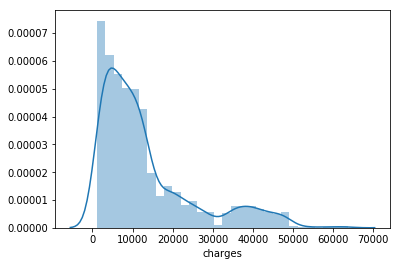

In [4]:
sns.distplot(df.charges)

In [5]:
numeric_col = df._get_numeric_data().columns.tolist()

In [6]:
numeric_col

['age', 'bmi', 'children', 'charges']

In [7]:
categorical_col = list(set(df.columns) - set(df._get_numeric_data().columns))

In [8]:
categorical_col

['smoker', 'sex', 'region']

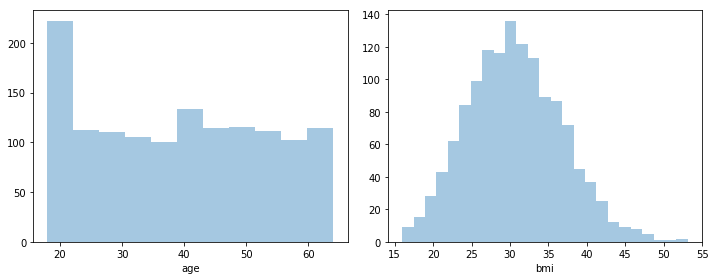

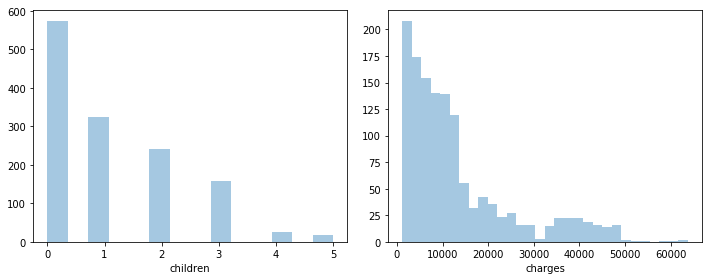

In [9]:
for i in range(0,len(numeric_col),2):
    if len(numeric_col) > i+1:
        plt.figure(figsize=(10,4))
        plt.subplot(121)
        sns.distplot(df[numeric_col[i]], kde=False)
        plt.subplot(122)            
        sns.distplot(df[numeric_col[i+1]], kde=False)
        plt.tight_layout()
        plt.show()

    else:
        sns.distplot(dataframe[numeric_col[i]], kde=False)

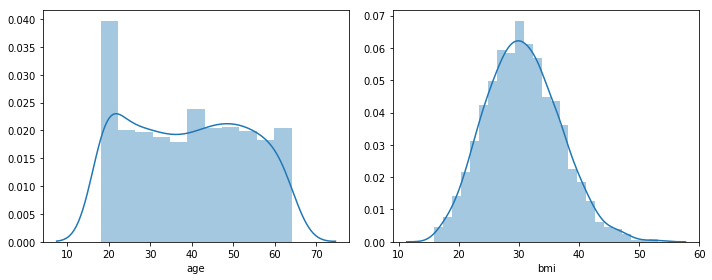

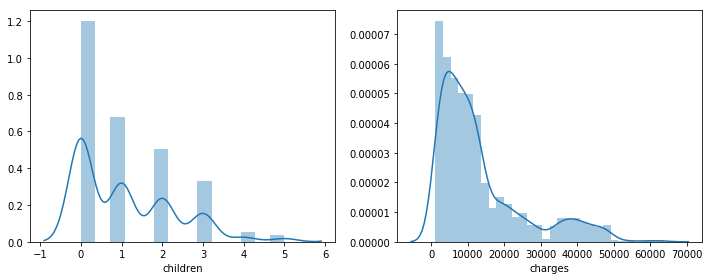

In [10]:
for i in range(0,len(numeric_col),2):
    if len(numeric_col) > i+1:
        plt.figure(figsize=(10,4))
        plt.subplot(121)
        sns.distplot(df[numeric_col[i]], kde=True)
        plt.subplot(122)            
        sns.distplot(df[numeric_col[i+1]], kde=True)
        plt.tight_layout()
        plt.show()

    else:
        sns.distplot(dataframe[numeric_col[i]], kde=True)

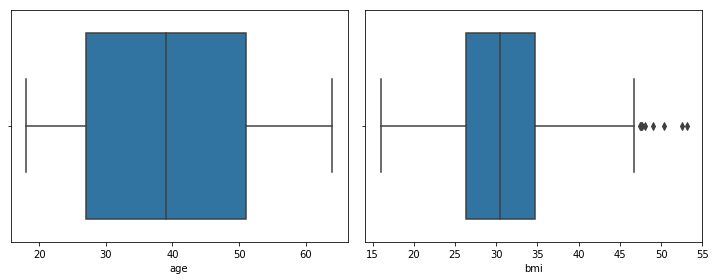

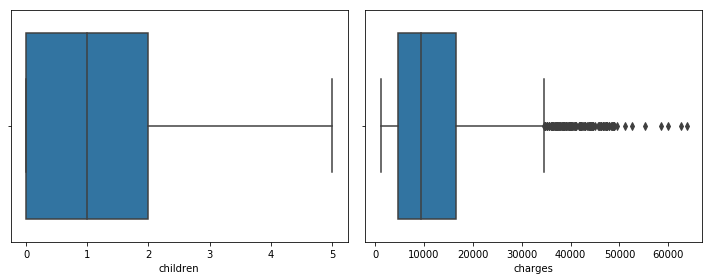

In [11]:
for i in range(0,len(numeric_col),2):
    if len(numeric_col) > i+1:
        plt.figure(figsize=(10,4))
        plt.subplot(121)
        sns.boxplot(df[numeric_col[i]])
        plt.subplot(122)            
        sns.boxplot(df[numeric_col[i+1]])
        plt.tight_layout()
        plt.show()

    else:
        sns.boxplot(dataframe[numeric_col[i]])

In [12]:
categorical_col

['smoker', 'sex', 'region']

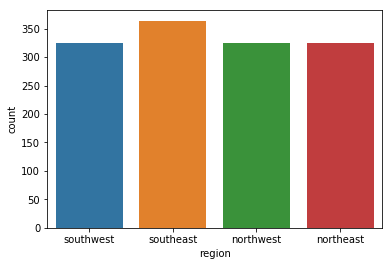

In [13]:
sns.countplot('region', data=df)

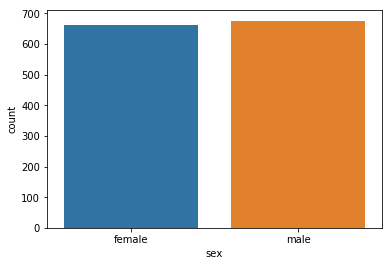

In [14]:
sns.countplot('sex', data=df)

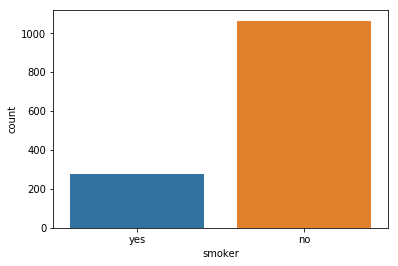

In [15]:
sns.countplot('smoker', data=df)

In [16]:
numeric_col

['age', 'bmi', 'children', 'charges']

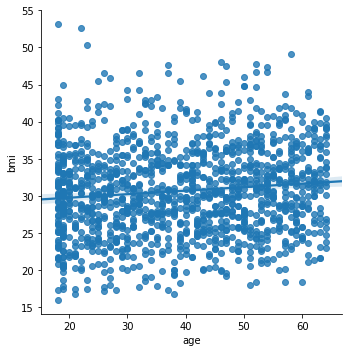

In [17]:
sns.lmplot('age', 'bmi', data=df, fit_reg=True)

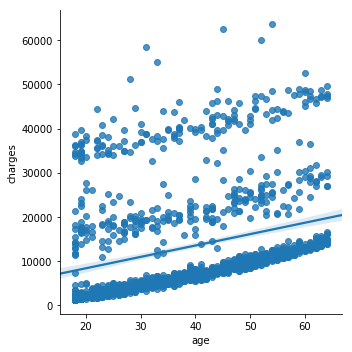

In [18]:
sns.lmplot('age', 'charges', data=df, fit_reg=True)

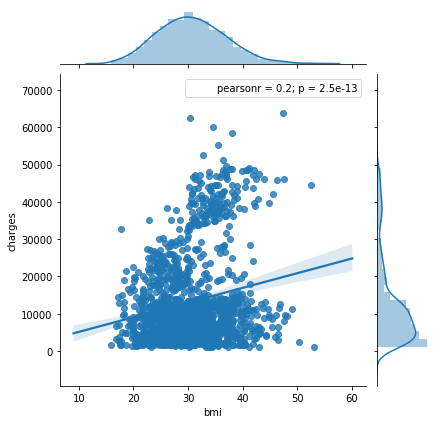

In [19]:
import scipy.stats as stats
j = sns.jointplot('bmi', 'charges', data=df, kind='reg')
j.annotate(stats.pearsonr)

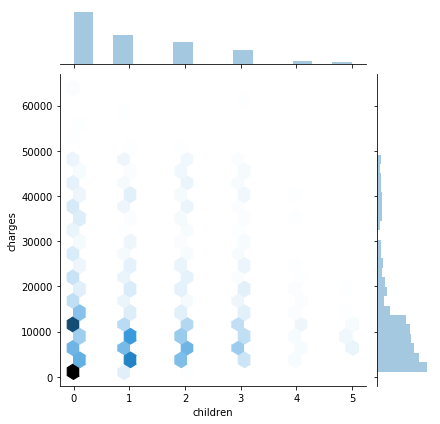

In [20]:
sns.jointplot('children', 'charges', data=df, kind='hex')

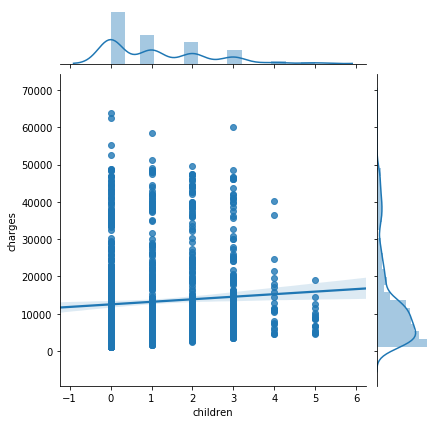

In [21]:
sns.jointplot('children', 'charges', data=df, kind='reg')

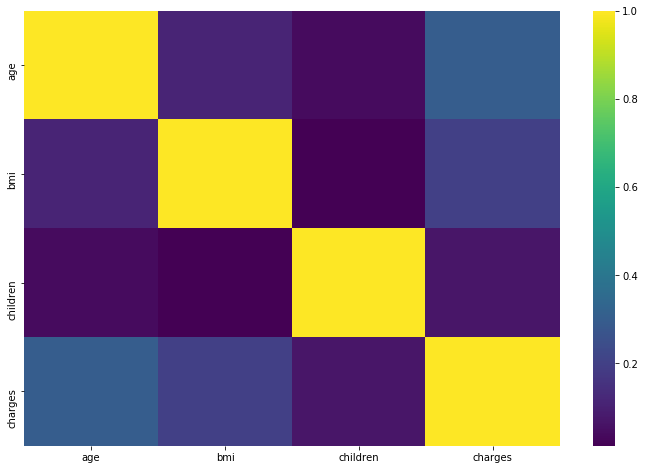

In [22]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap='viridis')

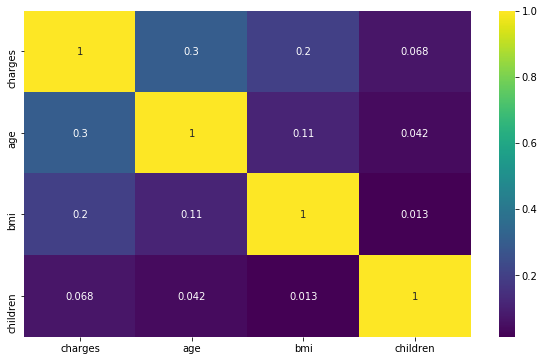

In [23]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = df.corr().nlargest(k, 'charges')['charges'].index
cm = df[cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'viridis')

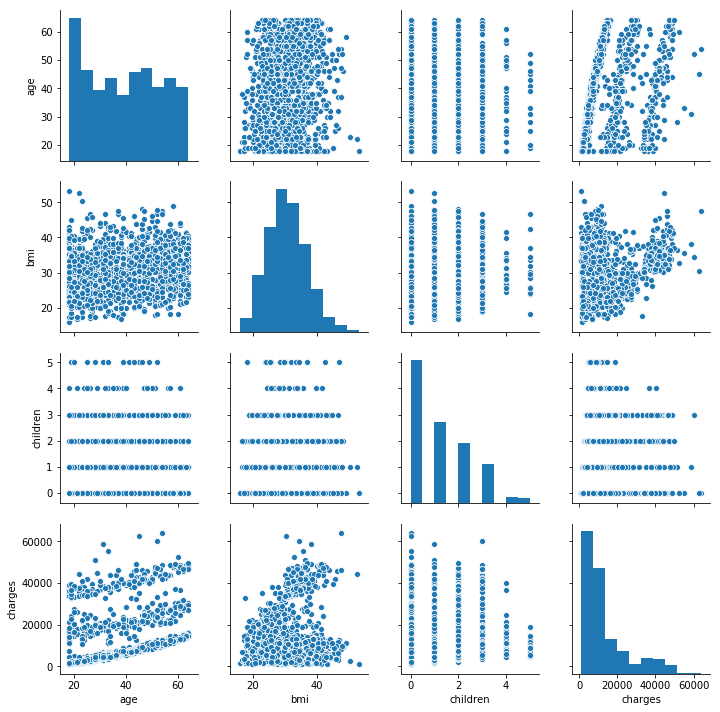

In [24]:
sns.pairplot(df[numeric_col])

In [25]:
numeric_col

['age', 'bmi', 'children', 'charges']

In [26]:
categorical_col

['smoker', 'sex', 'region']

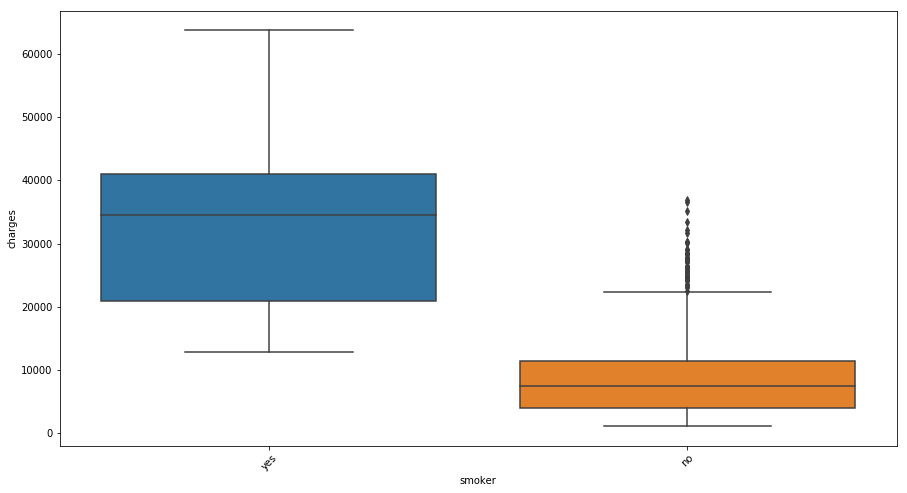

In [27]:
plt.figure(figsize=(15,8))
plt.xticks(rotation = 45)
sns.boxplot('smoker', 'charges', data=df)

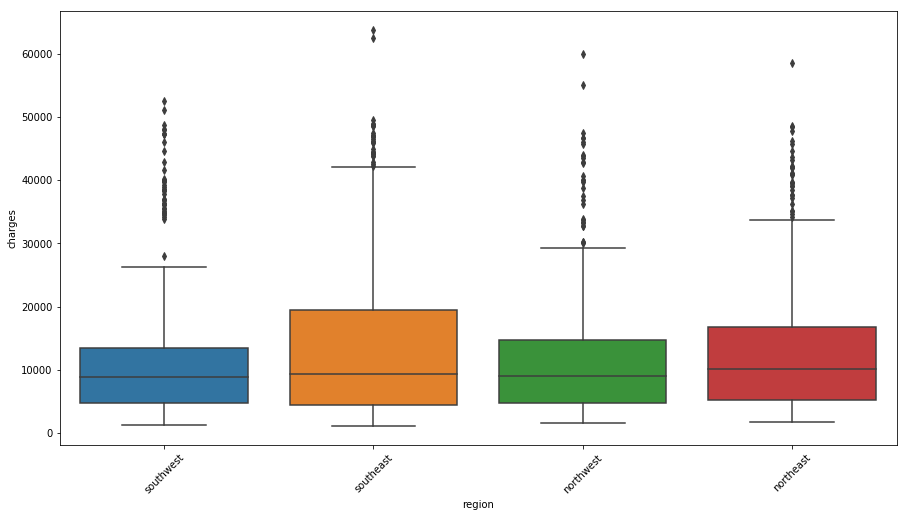

In [28]:
plt.figure(figsize=(15,8))
plt.xticks(rotation = 45)
sns.boxplot('region', 'charges', data=df)

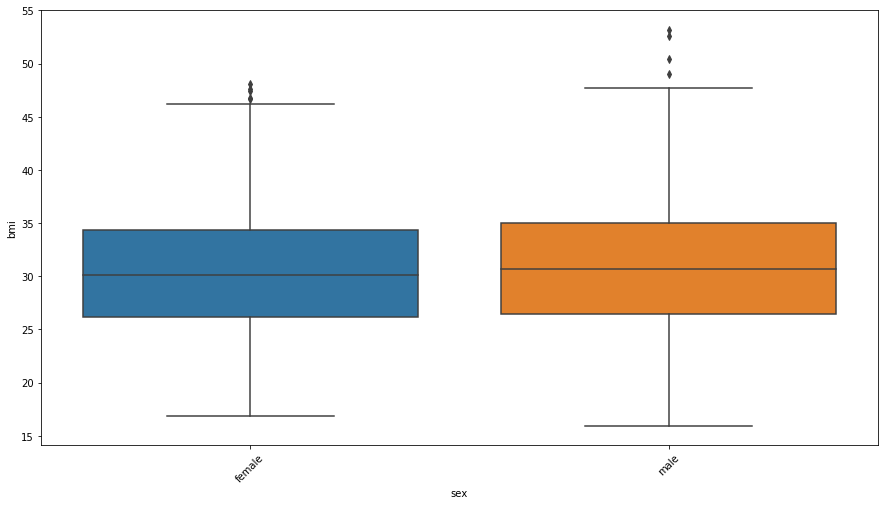

In [29]:
plt.figure(figsize=(15,8))
plt.xticks(rotation = 45)
sns.boxplot('sex', 'bmi', data=df)

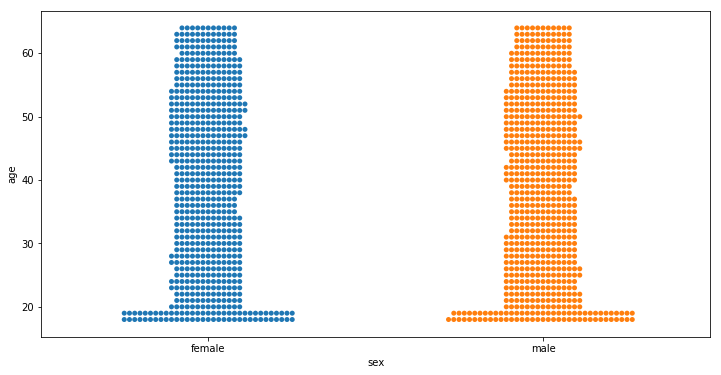

In [30]:
plt.figure(figsize=(12,6))
sns.swarmplot('sex', 'age', data=df)

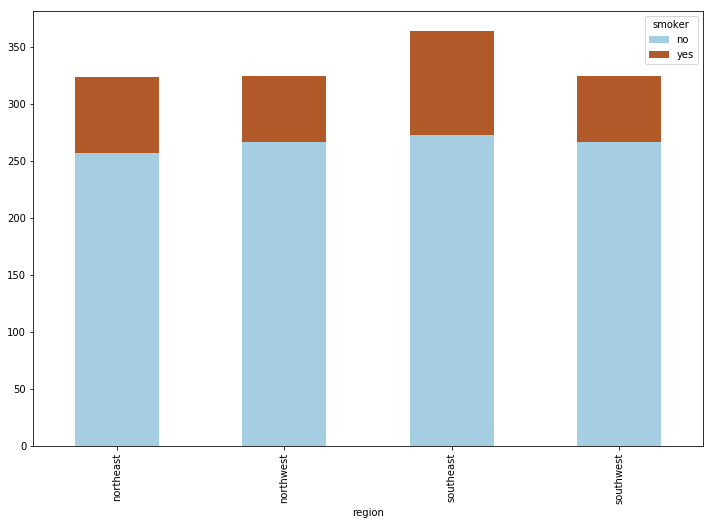

In [31]:
crosstab = pd.crosstab(index=df["region"], columns=df["smoker"])
crosstab.plot(kind="bar", figsize=(12,8), stacked=True, colormap='Paired')

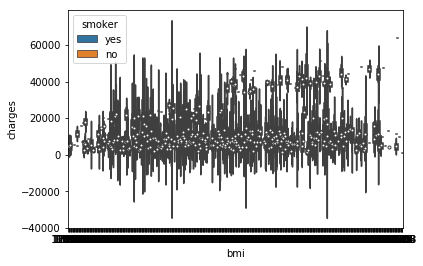

In [32]:
sns.violinplot(x=df.bmi, y=df.charges, hue=df.smoker, data=df)

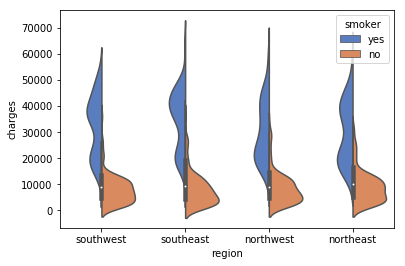

In [33]:
sns.violinplot(x=df.region, y=df.charges, hue=df.smoker, data=df, palette='muted', split=True)

In [34]:
categorical_col

['smoker', 'sex', 'region']

In [35]:
numeric_col

['age', 'bmi', 'children', 'charges']

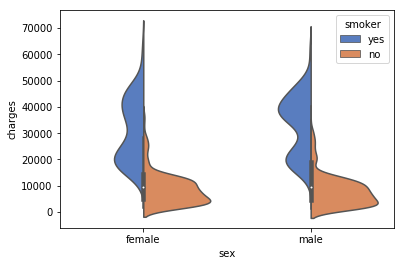

In [36]:
sns.violinplot(x=df.sex, y=df.charges, hue=df.smoker, data=df, palette='muted', split=True)

In [37]:
df['bmi_sqare'] = np.square(df['bmi'])
df['bmi_cube'] = df['bmi']**3
df['bmi_log'] = np.log10(df['bmi'])
df['bmi_sqare_root'] = np.sqrt(df['bmi'])

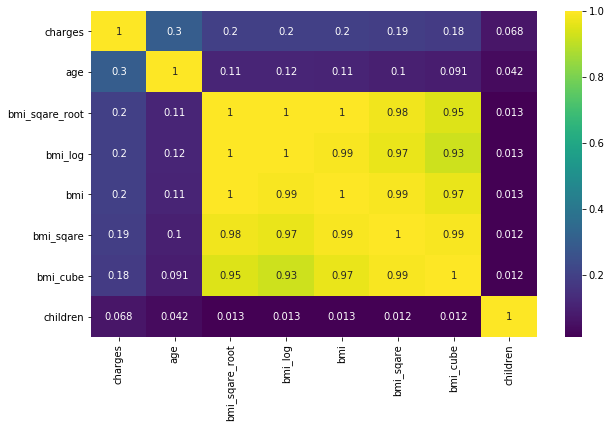

In [38]:
k = 10 #number of variables for heatmap
cols = df.corr().nlargest(k, 'charges')['charges'].index
cm = df[cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'viridis')

In [39]:
df['charages_log'] = np.log10(df['charges'])

In [40]:
df.charages_log.skew()

-0.09009752473025423

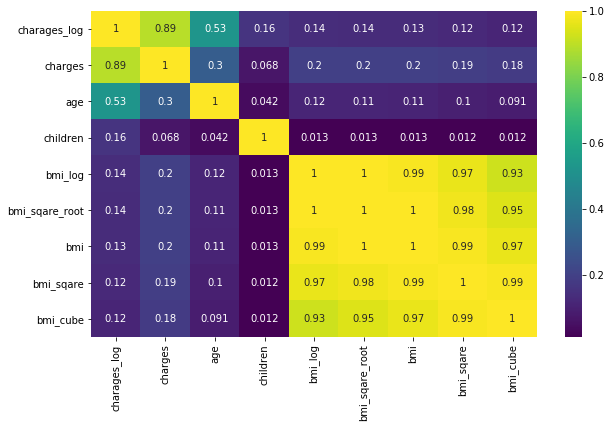

In [41]:
k = 10 #number of variables for heatmap
cols = df.corr().nlargest(k, 'charages_log')['charages_log'].index
cm = df[cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'viridis')

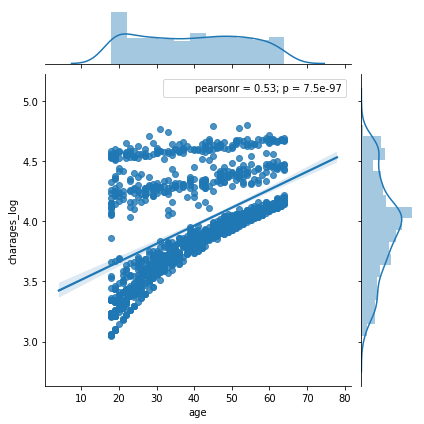

In [42]:
j = sns.jointplot('age', 'charages_log', data=df, kind='reg').annotate(stats.pearsonr)

In [43]:
df['charges_cube_root'] = df.charges**(1/3)

In [44]:
df.charges_cube_root.skew()

0.515182615434519

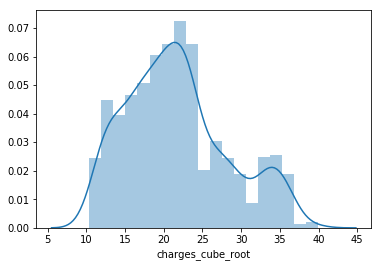

In [45]:
sns.distplot(df.charges_cube_root, kde=True)

In [46]:
df['charges_sixth_root'] = df.charges**(1/6)

In [47]:
df.charges_sixth_root.skew()

0.2179785776705679

In [48]:
df['charges_eigth_root'] = df.charges**(1/8)

In [49]:
df.charges_eigth_root.skew()

0.1417240062465346

In [50]:
df['charges_tenth_root'] = df.charges**(1/10)
df.charges_tenth_root.skew()

0.09568558769873407

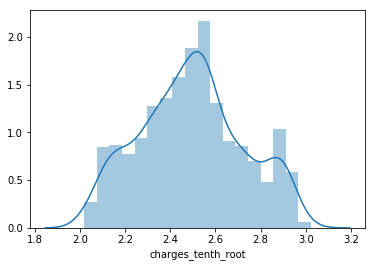

In [51]:
sns.distplot(df['charges_tenth_root'], kde=True)

In [52]:
df['charges_tweleth_root'] = df.charges**(1/10)
df.charges_tweleth_root.skew()

0.09568558769873407

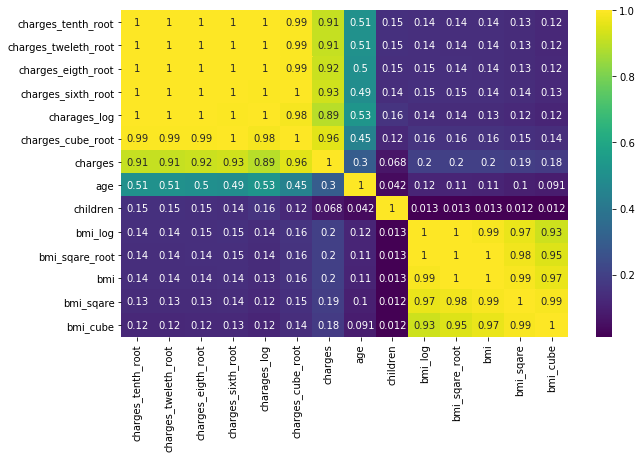

In [53]:
k = 20 #number of variables for heatmap
cols = df.corr().nlargest(k, 'charges_tenth_root')['charges_tenth_root'].index
cm = df[cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'viridis')

In [54]:
df['charges_log_log'] = np.log10(df['charages_log'])

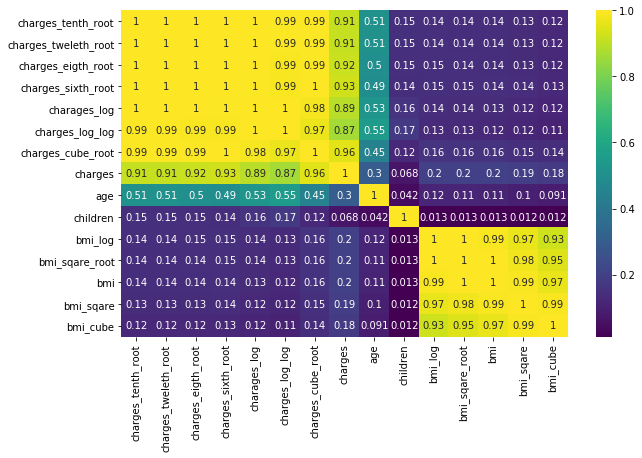

In [55]:
k = 20 #number of variables for heatmap
cols = df.corr().nlargest(k, 'charges_tenth_root')['charges_tenth_root'].index
cm = df[cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'viridis')

In [56]:
df.head()

,age,sex,bmi,children,smoker,region,charges,bmi_sqare,bmi_cube,bmi_log,bmi_sqare_root,charages_log,charges_cube_root,charges_sixth_root,charges_eigth_root,charges_tenth_root,charges_tweleth_root,charges_log_log
0,19,female,27.900,0,yes,southwest,16884.92400,778.410000,21717.639000,1.445604,5.282045,4.227499,25.654666,5.065044,3.376272,2.646975,2.646975,0.626084
1,18,male,33.770,1,no,southeast,1725.55230,1140.412900,38511.743633,1.528531,5.811196,3.236928,11.994331,3.463283,2.538727,2.107137,2.107137,0.510133
2,28,male,33.000,3,no,southeast,4449.46200,1089.000000,35937.000000,1.518514,5.744563,3.648308,16.447599,4.055564,2.857843,2.316492,2.316492,0.562091
3,33,male,22.705,0,no,northwest,21984.47061,515.517025,11704.814053,1.356122,4.764976,4.342116,28.013799,5.292806,3.489510,2.717763,2.717763,0.637701
4,32,male,28.880,0,no,northwest,3866.85520,834.054400,24087.491072,1.460597,5.374012,3.587358,15.695891,3.961804,2.808146,2.284209,2.284209,0.554775


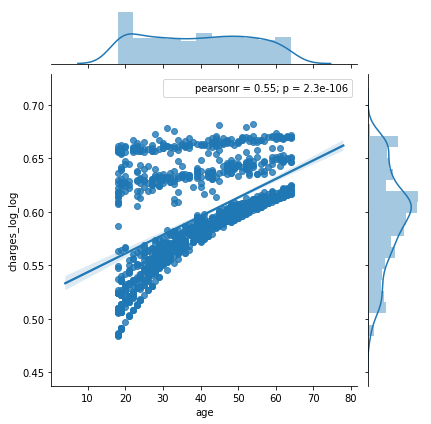

In [57]:
j = sns.jointplot('age', 'charges_log_log', data=df, kind='reg').annotate(stats.pearsonr)

In [58]:
df['chargest_log_log_log'] = np.log10(df['charges_log_log'])

In [59]:
df.chargest_log_log_log.skew()

-0.45987880984601465

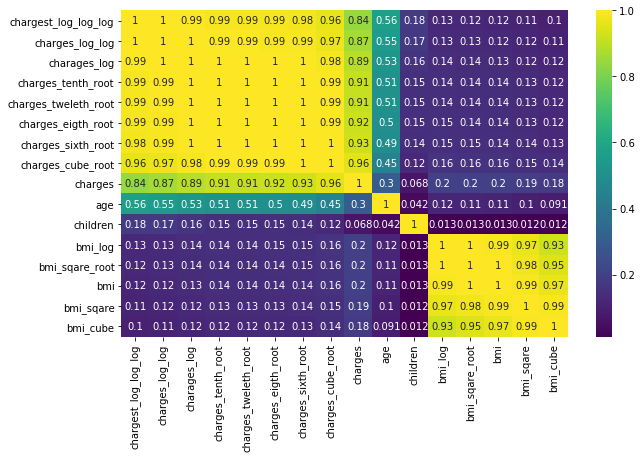

In [60]:
k = 20 #number of variables for heatmap
cols = df.corr().nlargest(k, 'chargest_log_log_log')['chargest_log_log_log'].index
cm = df[cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'viridis')

In [61]:
df.head()

,age,sex,bmi,children,smoker,region,charges,bmi_sqare,bmi_cube,bmi_log,bmi_sqare_root,charages_log,charges_cube_root,charges_sixth_root,charges_eigth_root,charges_tenth_root,charges_tweleth_root,charges_log_log,chargest_log_log_log
0,19,female,27.900,0,yes,southwest,16884.92400,778.410000,21717.639000,1.445604,5.282045,4.227499,25.654666,5.065044,3.376272,2.646975,2.646975,0.626084,-0.203368
1,18,male,33.770,1,no,southeast,1725.55230,1140.412900,38511.743633,1.528531,5.811196,3.236928,11.994331,3.463283,2.538727,2.107137,2.107137,0.510133,-0.292317
2,28,male,33.000,3,no,southeast,4449.46200,1089.000000,35937.000000,1.518514,5.744563,3.648308,16.447599,4.055564,2.857843,2.316492,2.316492,0.562091,-0.250193
3,33,male,22.705,0,no,northwest,21984.47061,515.517025,11704.814053,1.356122,4.764976,4.342116,28.013799,5.292806,3.489510,2.717763,2.717763,0.637701,-0.195383
4,32,male,28.880,0,no,northwest,3866.85520,834.054400,24087.491072,1.460597,5.374012,3.587358,15.695891,3.961804,2.808146,2.284209,2.284209,0.554775,-0.255883


In [62]:
x = np.array(range(100))
y = np.array(range(100))

In [63]:
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

In [64]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [65]:
reg = LinearRegression()

In [66]:
reg.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [67]:
reg.coef_

array([[1.]])

In [68]:
x[2] = 1000
y[2] = 2000
x[3]= 300
y[4] = 500

In [69]:
reg.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [70]:
reg.coef_

array([[1.81491442]])

In [71]:
y_pred = reg.predict(x)

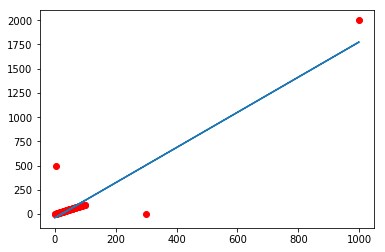

In [72]:
plt.scatter(x, y, color='red')
plt.plot(x, y_pred)

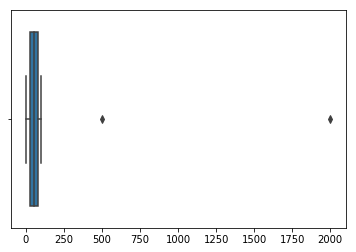

In [73]:
sns.boxplot(y)

In [74]:
boston = load_boston()

In [75]:
type(boston)

sklearn.utils.Bunch

In [76]:
x = boston.data

In [77]:
dir(boston)

['DESCR', 'data', 'feature_names', 'filename', 'target']

In [78]:
y = boston.target

In [79]:
cols = boston.feature_names

In [80]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [81]:
boston.data.shape

(506, 13)

In [82]:
boston.target.shape

(506,)

In [83]:
boston_df = pd.DataFrame(boston.data)
boston_df.columns = cols
boston_df_o = boston_df
boston_df.shape

(506, 13)

In [84]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [85]:
z= np.abs(stats.zscore(boston_df))

In [86]:
(z<3).all(axis=1).sum()

415

In [87]:
boston_df_o = boston_df_o[(z<3).all(axis=1)]

In [88]:
boston_df_o.shape

(415, 13)

In [89]:
Q1 = boston_df.quantile(0.25)

In [90]:
Q3 = boston_df.quantile(0.75)

In [91]:
IQR = Q3 - Q1

In [92]:
cond1 = (boston_df > (Q1 - 1.5 * IQR))

In [93]:
cond2 = (boston_df<(Q3 + 1.5 * IQR))

In [94]:
df1 = boston_df[cond1 & cond2]

In [95]:
boston_df.shape

(506, 13)

In [96]:
df.shape

(1338, 19)

In [97]:
raw_data = {'first_name': ['Jason', np.nan, 'Tina', 'Jake', 'Amy'], 
        'last_name': ['Miller', np.nan, 'Ali', 'Milner', 'Cooze'], 
        'age': [42, np.nan, 36, 24, 73], 
        'gender': ['m', np.nan, 'f', 'm', 'f'], 
        'preTestScore': [4, np.nan, np.nan, 2, 3],
        'postTestScore': [25, np.nan, np.nan, 62, 70]}
df_raw = pd.DataFrame(raw_data, columns = ['first_name', 'last_name', 'age', 'gender', 'preTestScore', 'postTestScore'])

In [98]:
df_raw.dropna()

,first_name,last_name,age,gender,preTestScore,postTestScore
0,Jason,Miller,42.0,m,4.0,25.0
3,Jake,Milner,24.0,m,2.0,62.0
4,Amy,Cooze,73.0,f,3.0,70.0


In [99]:
df_raw.dropna(how='all')

,first_name,last_name,age,gender,preTestScore,postTestScore
0,Jason,Miller,42.0,m,4.0,25.0
2,Tina,Ali,36.0,f,NaN,NaN
3,Jake,Milner,24.0,m,2.0,62.0
4,Amy,Cooze,73.0,f,3.0,70.0


In [100]:
df_raw['location'] = np.nan

In [101]:
df_raw

,first_name,last_name,age,gender,preTestScore,postTestScore,location
0,Jason,Miller,42.0,m,4.0,25.0,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Tina,Ali,36.0,f,NaN,NaN,NaN
3,Jake,Milner,24.0,m,2.0,62.0,NaN
4,Amy,Cooze,73.0,f,3.0,70.0,NaN


In [102]:
df_raw.dropna(axis=1, how='all')

,first_name,last_name,age,gender,preTestScore,postTestScore
0,Jason,Miller,42.0,m,4.0,25.0
1,NaN,NaN,NaN,NaN,NaN,NaN
2,Tina,Ali,36.0,f,NaN,NaN
3,Jake,Milner,24.0,m,2.0,62.0
4,Amy,Cooze,73.0,f,3.0,70.0


In [103]:
df_raw

,first_name,last_name,age,gender,preTestScore,postTestScore,location
0,Jason,Miller,42.0,m,4.0,25.0,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Tina,Ali,36.0,f,NaN,NaN,NaN
3,Jake,Milner,24.0,m,2.0,62.0,NaN
4,Amy,Cooze,73.0,f,3.0,70.0,NaN


In [104]:
boston_df.shape

(506, 13)

In [105]:
boston_df.sum(axis=0).shape

(13,)

In [106]:
boston_df.sum(axis=1).shape

(506,)

In [107]:
df_raw.fillna(10)

,first_name,last_name,age,gender,preTestScore,postTestScore,location
0,Jason,Miller,42.0,m,4.0,25.0,10.0
1,10,10,10.0,10,10.0,10.0,10.0
2,Tina,Ali,36.0,f,10.0,10.0,10.0
3,Jake,Milner,24.0,m,2.0,62.0,10.0
4,Amy,Cooze,73.0,f,3.0,70.0,10.0


In [108]:
df_raw.fillna(method='ffill')

,first_name,last_name,age,gender,preTestScore,postTestScore,location
0,Jason,Miller,42.0,m,4.0,25.0,NaN
1,Jason,Miller,42.0,m,4.0,25.0,NaN
2,Tina,Ali,36.0,f,4.0,25.0,NaN
3,Jake,Milner,24.0,m,2.0,62.0,NaN
4,Amy,Cooze,73.0,f,3.0,70.0,NaN


In [109]:
df_raw['preTestScore'].fillna(df_raw['preTestScore'].mean(), inplace=True)

In [110]:
df_raw

,first_name,last_name,age,gender,preTestScore,postTestScore,location
0,Jason,Miller,42.0,m,4.0,25.0,NaN
1,NaN,NaN,NaN,NaN,3.0,NaN,NaN
2,Tina,Ali,36.0,f,3.0,NaN,NaN
3,Jake,Milner,24.0,m,2.0,62.0,NaN
4,Amy,Cooze,73.0,f,3.0,70.0,NaN


In [111]:
df['preTestScore'].fillna(df['preTestScore'].mean(), inplace=True)

KeyError: 'preTestScore'

In [ ]:
df[df['age'].notnull() & df['gender'].notnull()]

In [ ]:
cols = df._get_numeric_data().columns.tolist()

In [ ]:
cols

In [ ]:
imp = Imputer(missing_values = 'NaN', strategy='mean')
imp.fit(df[cols])

In [ ]:
df[cols] = imp.transform(df[cols])

In [ ]:
df